In [1]:
from statistics import mean, variance, stdev
from Tulap import rTulap, varTulap
from pvalue import pvalLeft, pvalRight
from pvalTwoSide import pvalTwoSide
from CIOneSide import CILower, CIUpper
from UMP import UMP
from UMPU import UMPU
from umpuApprox import umpuApprox
import math
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
from scipy.stats import kde, norm, binom
import seaborn as sns

## 1. The Truncated-Uniform-Laplace (Tulap) Distrubution

### Mean and Variance

In [2]:
random.seed(12345)
tulap_data = rTulap(n=10000, m=30, b=math.exp(-1), q=0)

print("tulap data:", np.round(tulap_data, 2))
print("estimated mean:", sum(tulap_data - mean(tulap_data))/stdev(tulap_data), "||", "mean:", 0)
print("estimated variance:", varTulap(math.exp(-1)), "||", "variance:", variance(tulap_data))

tulap data: [31.52 30.48 30.35 ... 28.92 29.64 30.79]
estimated mean: 4.977912476619936e-12 || mean: 0
estimated variance: 1.924680521748918 || variance: 1.936846156563453


### Plot

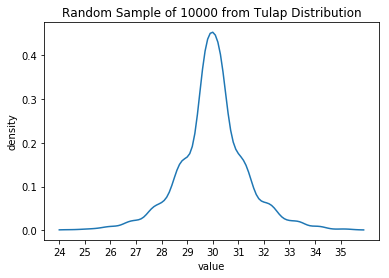

In [3]:
density = kde.gaussian_kde(tulap_data)
x = np.arange(24, 36, 0.1)
plt.plot(x, density(x))
plt.xticks(np.arange(24, 36, 1))
plt.xlabel("value")
plt.ylabel("density")
plt.title("Random Sample of 10000 from Tulap Distribution")
plt.savefig("Tulap Distribution")
plt.show()
plt.close()

## 2. Simulated Data

In [4]:
## set up the parameters
random.seed(12345)
n = 30                      # number of trials
true_theta = 0.4            # true theta
reps = 10000                # sample size
ep = 1                      # epsilon
de = 0.01                   # delta
b = math.exp(-ep)           # b
q = 2*de*b/(1-b+2*de*b)     # q
alpha = 0.05                # level alpha

## create the orginal data through binomial simulation
X = random.binomial(n = n, p = true_theta, size = reps)

## add Tulap noise to the original
Z = [0] * len(X)
Z = X + rTulap(n=reps, m=0, b=b, q=q)


print("X:", X)
print("Z:", np.round(Z, 2))

X: [16 11 10 ...  7 10 14]
Z: [16.48 10.19 10.35 ...  6.46  8.66 15.92]


## 3. Differentially Private Uniformly Most Powerful Tests (DP-UMP)

### 3.1. Simple and One-Sided DP-UMP Tests

left DP-UMP test: [0.   0.   0.   0.   0.01 0.04 0.12 0.35 0.76 0.92 0.97]
right DP-UMP test: [1.   1.   1.   1.   0.99 0.96 0.88 0.65 0.24 0.08 0.03]


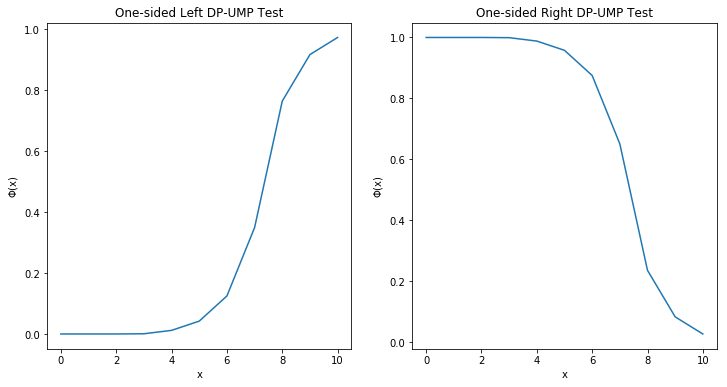

In [5]:
ump = UMP(theta=0.4, size=10, alpha=0.05, epsilon=ep, delta=de)
leftUMP = ump.umpLeft()
rightUMP = ump.umpRight()
print("left DP-UMP test:", np.round(leftUMP, 2))
print("right DP-UMP test:", np.round(rightUMP, 2))
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(np.arange(0, ump.size+1), leftUMP)
ax[0].set_title("One-sided Left DP-UMP Test")
ax[0].set(xlabel="x", ylabel="{}(x)".format(r'$\Phi$'))
ax[1].plot(np.arange(0, ump.size+1), rightUMP)
ax[1].set_title("One-sided Right DP-UMP Test")
ax[1].set(xlabel="x", ylabel="{}(x)".format(r'$\Phi$'))
plt.savefig("DP-UMP_test")
plt.show()
plt.close()

In [6]:
# test if the power of the left UMP is 0.05
B = binom.pmf(k=list(range(0, 11)), n=10, p=true_theta)
print("power of left UMP: ", round(np.dot(B, leftUMP), 2))

power of left UMP:  0.05


### 3.2. Unbiased Two-Sided DP-UMP Tests

In [7]:
ump2 = UMPU(theta=0.4, size=10, alpha=0.05, epsilon=ep, delta=de)
umpu = ump2.umpu()
print("two sided DP-UMP test:", umpu)

two sided DP-UMP test: [0.58409135 0.21119641 0.07401602 0.02355018 0.00498483 0.01693823
 0.05604288 0.16234034 0.4512868  0.80181849 0.93077189]


In [8]:
# test if the power of the two-sided UMP is 0.05
B = binom.pmf(k=list(range(0, 11)), n=10, p=true_theta)
print("power of two-sided UMP: ", round(np.dot(B, umpu), 2))

power of two-sided UMP:  0.05


### 3.3. Asymptotically Unbiased Two-Sided DP-UMP Tests

In [9]:
ump2_apprx = umpuApprox(theta=0.4, size=10, alpha=0.05, epsilon=ep, delta=de)
numpu = ump2_apprx.numpu()
print("asymptotically two sided DP-UMP test:", numpu)

asymptotically two sided DP-UMP test: [0.51809014 0.18691592 0.06508373 0.02026417 0.00377598 0.02026417
 0.06508373 0.18691592 0.51809014 0.82639406 0.93981274]


In [10]:
# test if the power of the asymptotically two-sided UMP is 0.05
B = binom.pmf(k=list(range(0, 11)), n=10, p=true_theta)
print("power of assymptotically two-sided UMP: ", round(np.dot(B, numpu), 2))

power of assymptotically two-sided UMP:  0.05


### plot

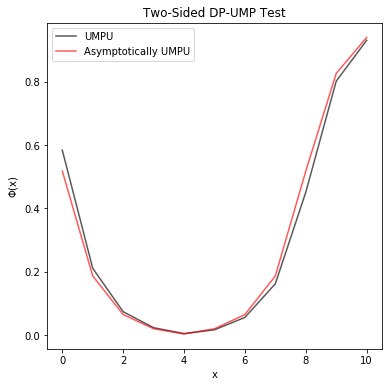

In [11]:
plt.figure(figsize=(6, 6))
plt.plot(umpu, color='k', alpha=0.65, label="UMPU")
plt.plot(numpu, color='r', alpha=0.65, label="Asymptotically UMPU")
plt.legend()
plt.title("Two-Sided DP-UMP Test")
plt.xlabel("x")
plt.ylabel("{}(x)".format(r'$\Phi$'))
plt.savefig("twoSided_DP-UMP_test")
plt.show()
plt.close()

## 4. P-value

### 4.1. UMP One-Sided p-Values

In [12]:
pvalL = pvalLeft(Z, size = n, theta = 0.4, b = b, q = q)
pvalR = pvalRight(Z, size = n, theta = 0.4, b = b, q = q)
print("Z:", np.round(Z, 2))
print("Left private p-value:", np.round(pvalL[:9], 2))
print("Right private p-value:", np.round(pvalR[:9], 2))

Z: [16.48 10.19 10.35 ...  6.46  8.66 15.92]
Left private p-value: [0.93 0.27 0.29 0.09 0.62 0.76 0.92 0.51 0.86]
Right private p-value: [0.07 0.73 0.71 0.91 0.38 0.24 0.08 0.49 0.14]


In [13]:
# since the true value θ=0.4 is in the null hypothesis, this confirms that the p-value has calibrated type I error:
print("Left private p-value mean:", np.mean(np.less_equal(pvalL, 0.05).astype(int)))
print("Right private p-value mean:", np.mean(np.less_equal(pvalR, 0.05).astype(int)))


Left private p-value mean: 0.0465
Right private p-value mean: 0.053


### 4.2. Asymptotically Unbiased DP p-Values

In [14]:
upval = pvalTwoSide(Z, size = n, theta = 0.5, b = b, q = q)
print("Z:", np.round(Z, 2))
print("unbiased pvalue:", np.round(upval[:9], 2))

Z: [16.48 10.19 10.35 ...  6.46  8.66 15.92]
unbiased pvalue: [0.62 0.11 0.12 0.02 0.48 0.77 0.7  0.33 0.95]


### 4.3. Comparing Private and Non-Private p-values

In [15]:
# calculate the non-private p-values using the first observation in the original data X:
x = (X[0]/n-0.5)/math.sqrt(0.5**2/30)
pR = norm.sf(x, loc=0, scale=1)    # loc = mean, scale = sd, sf() is equivalent to 1-cdf() -> upper tail
print("non-private pvalues: ", pR)

non-private pvalues:  0.35750032734404463


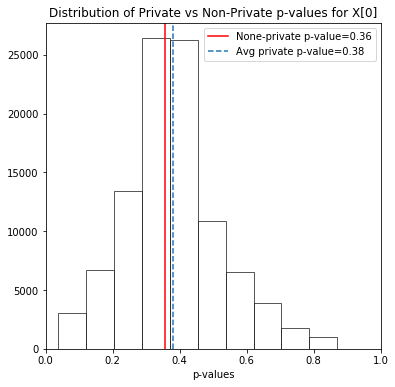

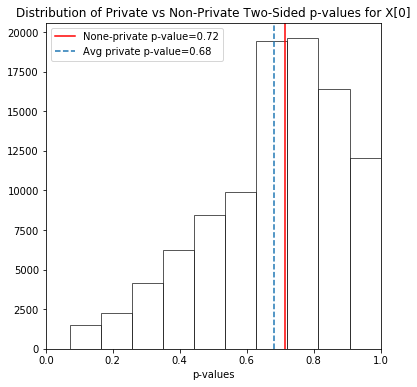

In [16]:
# Then we add Tulap noise to the true data and calculate the private p-values 100,000 times. 
# The distribution of private p-values compared to the non-private one is shown in the plot below. 
# The randomness of private p-values helps preserve privacy.

# calculate private pvalue of the first observation 100000 times
tulap = [X[0]]*100000 + rTulap(n=100000, m=0, b=b, q=q)
ppval = pvalRight(tulap, n, 0.5, b, q)
plt.figure(figsize=(6, 6))
plt.hist(ppval, color='white', edgecolor='k', alpha=0.65)
plt.axvline(pR, color='red')    # equivalent to abline in R
plt.axvline(mean(ppval), linestyle='dashed')
plt.legend(["None-private p-value={}".format(round(pR, 2)), "Avg private p-value={}".format(round(mean(ppval), 2))])
plt.xlim((0, 1))
plt.title("Distribution of Private vs Non-Private p-values for X[0]")
plt.xlabel("p-values")
plt.savefig("private_nonPrivate_pvalues")
plt.show()
plt.close()

# similarly, we continue to compare private vs. non private two-sided p-values:

# calculate non-private two-sided p-values
p2 = 2*norm.sf(abs(x), loc=0, scale=1)
# calculate private two-sided p-values
ppval2 = pvalTwoSide(tulap, n, 0.5, b, q)
plt.figure(figsize=(6, 6))
plt.hist(ppval2, color='white', edgecolor='k', alpha=0.65)
plt.axvline(p2, color='red')    # equivalent to abline in R
plt.axvline(mean(ppval2), linestyle='dashed')
plt.legend(["None-private p-value={}".format(round(p2, 2)), "Avg private p-value={}".format(round(mean(ppval2), 2))])
plt.xlim((0, 1))
plt.title("Distribution of Private vs Non-Private Two-Sided p-values for X[0]")
plt.xlabel("p-values")
plt.savefig("private_nonPrivate_twoSided_pvalues")
plt.show()
plt.close()

## 5 Confidence Intervals

### 5.1. One-sided Confidence Intervals

In [17]:
ci_low = [0] * 10
ci_up = [0] * 10
for i in range(10):
  ci_low[i] = round(CILower(alpha = 0.05, Z=Z[i], size = n, b = b, q = q), 3)
  ci_up[i] = round(CIUpper(alpha = 0.05, Z=Z[i], size = n, b = b, q = q), 3)
print("Z:", np.round(Z[:9], 2))
print("Lower CI:", ci_low)
print("Upper CI:", ci_up)

Z: [16.48 10.19 10.35  8.   12.88 14.13 16.15 12.07 15.18]
Lower CI: [0.39, 0.2, 0.2, 0.14, 0.27, 0.31, 0.37, 0.25, 0.34, 0.29]
Upper CI: [0.7, 0.51, 0.51, 0.43, 0.59, 0.63, 0.7, 0.57, 0.67, 0.61]
